# QUESTION 1:
# (a) Understand the code completely and run it.
# (b) Explain the following Pytorch Functions: (i) conv2D (ii) MaxPool2d (iii)
# Linear (iv) Relu (v) linear.
# (c) Plot the loss function.

In [ ]:
# 1 b)
# i)Conv2D:
# The conv2D is basically a function in the Pytorch. 
# It performs a 2D convolution on a given input tensor.
# So basically it takes a tensor as an input to perform the image processing tasks. 
# It contains a filter which when applied on the input tensor, throws a feature map.
# This filter is applied based on the strides, and filter, given the application is possible on the tensor. 
# Finally, it results in a feature map as output.


# ii)MaxPool2d:
# MaxPool2d is a function in the Pytorch which is used to reduce the number of layers in the given input tensor. 
# From the spatial part it takes the maximum value of the given part and ultimately returns a concise tensor with 
# reduced layers. The computational complexity is hence reduced in the CNN.

# iii)Linear:
# The linear activation function mainly works for the data which has linear type of relation amongst themselves.
# But for non-linear data it fails. The Linear activation function is f(x) = x basically returns just the one layer.

# iv)ReLU:
# ReLU is called as Rectified Linear Activation Function. This gives better performance. 
# The vanishing gradient problem is solved by using ReLU. ReLU is not differentiable at all x, except at x = 0. 
# The slope for positive value is taken as 1 and that of negatives are taken as 0. 
# The behaviour is close to linear hence quite useful as well. 


In [1]:
# Question 1a), 1c) Done together. Full code and the plot
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Transforming to tensors
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


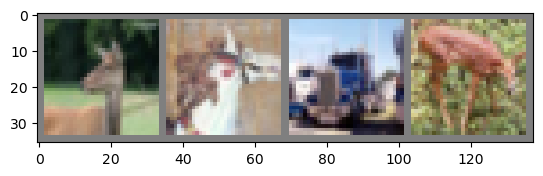

deer  horse truck deer 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

#THE FUNCTION TO SHOW AN IMAGE


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# RANDOM TRAINING IMAGE
dataiter = iter(trainloader)
images, labels = next(dataiter)

# SHOWING THE IMAGES
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [5]:
# OPTIMIZER

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# THE TRAINING

[1,  2000] loss: 1.267
[1,  4000] loss: 1.234
[1,  6000] loss: 1.236
[1,  8000] loss: 1.235
[1, 10000] loss: 1.244
[1, 12000] loss: 1.248
[2,  2000] loss: 1.260
[2,  4000] loss: 1.230
[2,  6000] loss: 1.241
[2,  8000] loss: 1.262
[2, 10000] loss: 1.232
[2, 12000] loss: 1.245


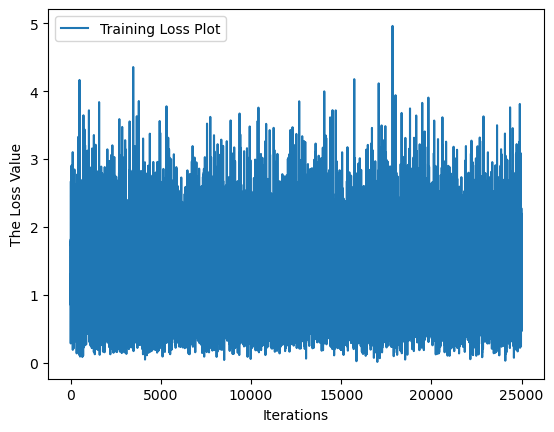

Finished Training


In [24]:
import matplotlib.pyplot as plt


loss_val = []

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        loss_val.append(loss.item())
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            
            running_loss = 0.0


plt.plot(loss_val, label='Training Loss Plot')
plt.xlabel('Iterations')
plt.ylabel('The Loss Value')
plt.legend()
plt.show()
print('Finished Training')

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

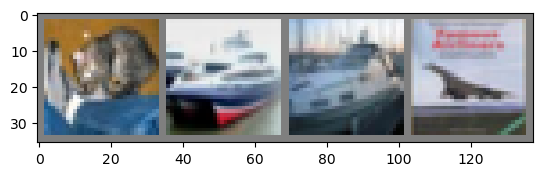

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [12]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   plane car   plane


# THE WHOLE DATASET IS NOW TAKEN FOR PREDICTION!!

In [15]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 71.1 %
Accuracy for class: car   is 66.3 %
Accuracy for class: bird  is 56.0 %
Accuracy for class: cat   is 31.8 %
Accuracy for class: deer  is 44.8 %
Accuracy for class: dog   is 31.9 %
Accuracy for class: frog  is 66.8 %
Accuracy for class: horse is 69.1 %
Accuracy for class: ship  is 41.5 %
Accuracy for class: truck is 64.5 %


In [18]:
# # IS GPU THERE?
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# # Assuming that we are on a CUDA machine, this should print a CUDA device:

# print(device)

cpu
